In [32]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [2]:
!pip install -Uq fastai2
import fastai2
from fastai2.vision import *

!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()
from fastbook import *
from fastai.vision.widgets import *

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.4/179.4 kB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.7/19.7 MB 13.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.8/719.8 kB 14.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.8/547.8 kB 38.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.9/64.9 kB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 10.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 316.1/316.1 kB 26.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.9/39.9 MB 18.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 12.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 17.4 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.4.1 requir

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from pathlib import Path

In [19]:
faces = 'ayanami_rei', 'souryuu_asuka_langley', 'kamado_nezuko', 'nagisa_kaworu'
path = 'gdrive/MyDrive/learn'
p_path=Path(path)
fns = get_image_files(path)
fns

(#247) [Path('gdrive/MyDrive/learn/ayanami_rei/1186067.jpg'),Path('gdrive/MyDrive/learn/ayanami_rei/1186062.jpg'),Path('gdrive/MyDrive/learn/ayanami_rei/1302099.jpg'),Path('gdrive/MyDrive/learn/ayanami_rei/1318120.jpg'),Path('gdrive/MyDrive/learn/ayanami_rei/134141.jpg'),Path('gdrive/MyDrive/learn/ayanami_rei/13614912451.jpg'),Path('gdrive/MyDrive/learn/ayanami_rei/1431125.jpg'),Path('gdrive/MyDrive/learn/ayanami_rei/1457048.jpg'),Path('gdrive/MyDrive/learn/ayanami_rei/147142.jpg'),Path('gdrive/MyDrive/learn/ayanami_rei/1475125.jpg')...]

In [20]:
dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(96))

In [21]:
dls = dls.dataloaders(path)

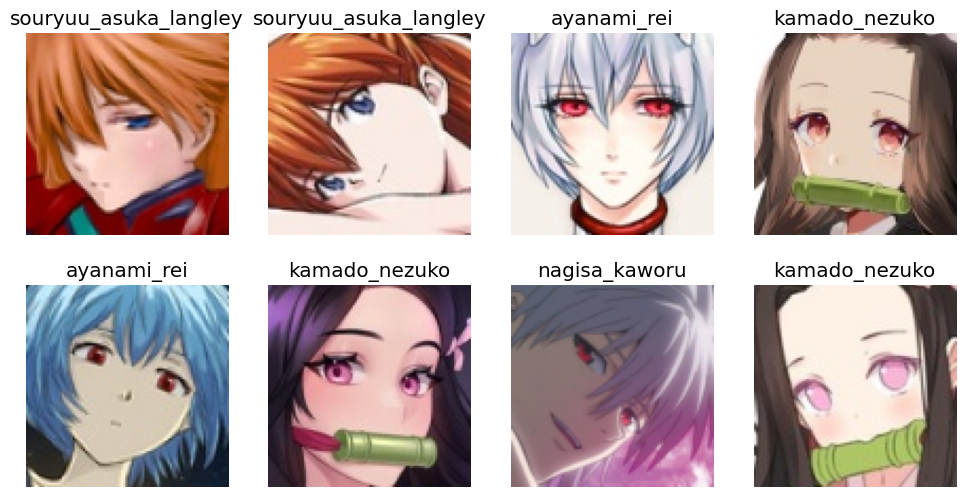

In [22]:
dls.valid.show_batch(max_n=8, nrows=2)

In [23]:
learn = vision_learner(dls, resnet101, metrics=[accuracy,error_rate],)
learn.fine_tune(6)

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,1.997516,0.816706,0.653061,0.346939,00:01


epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.773054,0.629298,0.775510,0.224490,00:01
1,0.608460,0.487743,0.775510,0.224490,00:01
2,0.465189,0.411777,0.795918,0.204082,00:01
3,0.360773,0.312745,0.857143,0.142857,00:02
4,0.298071,0.240517,0.897959,0.102041,00:02
5,0.252308,0.261981,0.897959,0.102041,00:01


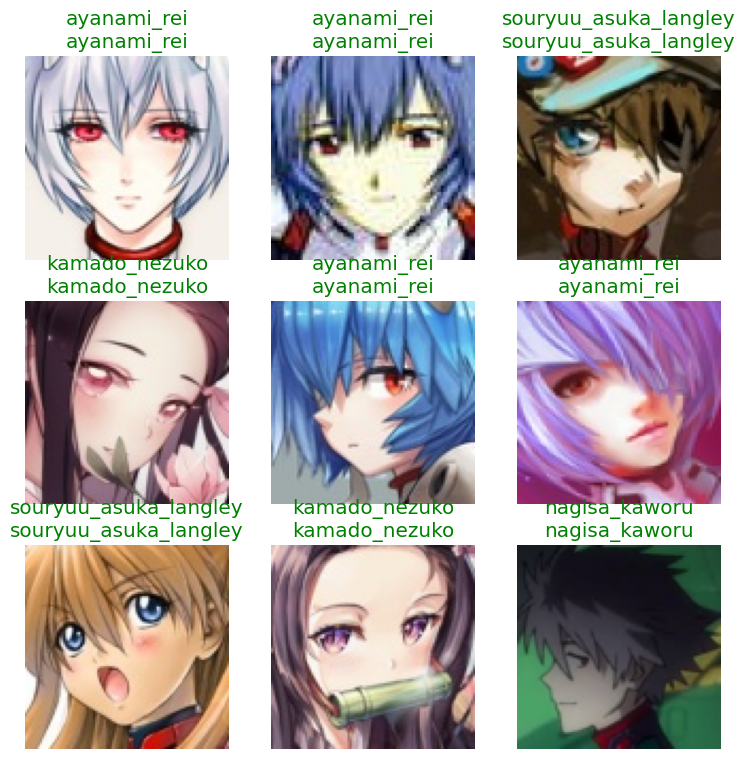

In [24]:
learn.show_results()

<Axes: >

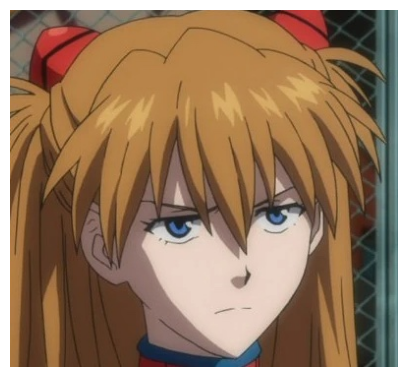

In [25]:
img1 = PILImage.create('gdrive/MyDrive/Validation/1.jpg')
img1.show()

In [26]:
learn.predict(img1)[0]

'souryuu_asuka_langley'

<Axes: >

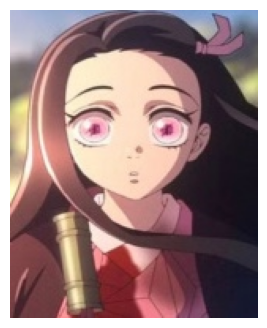

In [28]:
img2 = PILImage.create('gdrive/MyDrive/Validation/10002.jpg')
img2.show()

Intresting to see that the classifier can detect Nzeuko even though the piece is missing from her mouth

In [29]:
learn.predict(img2)[0]

'kamado_nezuko'

<Axes: >

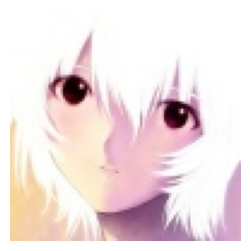

In [30]:
img3 = PILImage.create('gdrive/MyDrive/Validation/2.jpg')
img3.show()

In [31]:
learn.predict(img3)[0]

'ayanami_rei'

<Axes: >

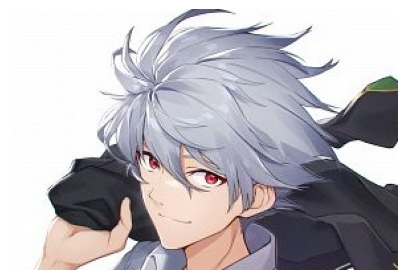

In [33]:
img4 = PILImage.create('gdrive/MyDrive/Validation/3.jpg')
img4.show()

In [34]:
learn.predict(img4)[0]

'nagisa_kaworu'